## Problem Statement:

Handwritten digit recognition is a fundamental problem in the field of computer vision and machine learning. Banks, postal services, and other organizations often need to automatically process handwritten numbers from checks, forms, and documents to reduce manual effort and errors.

The MNIST dataset contains 70,000 images of handwritten digits (0–9) and serves as a benchmark for building and testing models capable of accurate digit recognition.

Objective:

Build machine learning and deep learning models (e.g., ANN, CNN) to classify handwritten digits with high accuracy.

Evaluate model performance and identify the most effective approach.

Enable automatic digit recognition to improve efficiency in real-world applications such as banking, postal services, and document digitization.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

In [4]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [15]:
print(f"train_images shape:{train_images.shape}")
print(f"train_labels shape:{train_labels.shape}")
print(f"test_images shape:{test_images.shape}")
print(f"test_labels shape:{test_labels.shape}")

train_images shape:(60000, 28, 28)
train_labels shape:(60000,)
test_images shape:(10000, 28, 28)
test_labels shape:(10000,)


[(np.uint8(0), 5923), (np.uint8(1), 6742), (np.uint8(2), 5958), (np.uint8(3), 6131), (np.uint8(4), 5842), (np.uint8(5), 5421), (np.uint8(6), 5918), (np.uint8(7), 6265), (np.uint8(8), 5851), (np.uint8(9), 5949)]


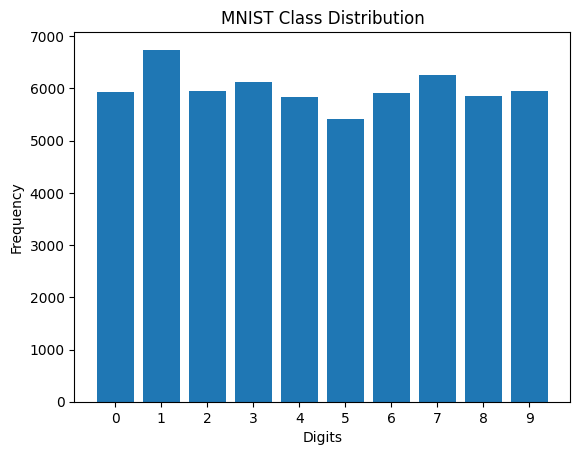

In [14]:
from collections import Counter
import matplotlib.pyplot as plt

counts = Counter(train_labels)
print(sorted(counts.items(), key=lambda x: x[0]))

plt.bar(counts.keys(), counts.values())
plt.xticks(range(10))
plt.xlabel("Digits")
plt.ylabel("Frequency")
plt.title("MNIST Class Distribution")
plt.show()


 We can see our train labels are not imbalance type every label has sufficient amount of data....

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

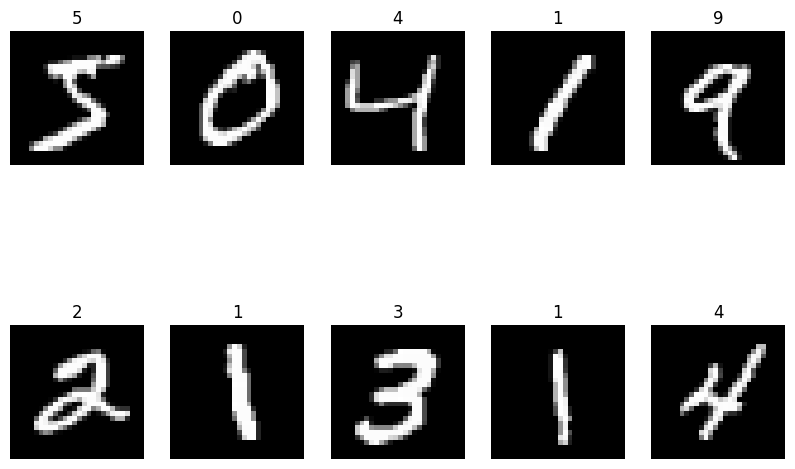

In [ ]:
 # visulising ghe first 10 train images with labels
plt.figure(figsize=(10,7))
graph=1
for i in range(10):
  plt.subplot(2,5,graph)
  plt.imshow(train_images[i],cmap='gray')
  plt.title(train_labels[i])
  plt.axis('off')
  graph=graph+1
plt.show()

In [ ]:

train_images = train_images.astype('float32')/255 # normalising the pixels
test_images = test_images.astype('float32')/255

In [ ]:
train_images=train_images.reshape((-1,28,28,1))  # reshape the image for cnn
test_images=test_images.reshape((-1,28,28,1))

In [ ]:
# now lets encode the categorical value of train and test labels
train_labels=tf.keras.utils.to_categorical(train_labels)
test_labels=tf.keras.utils.to_categorical(test_labels)

In [ ]:
# data augmentation layer
data_augmentation=tf.keras.Sequential([layers.RandomRotation(0.10),
                                       layers.RandomZoom(0.10)])

In [ ]:
# cnn
def create_model():
  model=models.Sequential([layers.Input(shape=(28,28,1)),
                           data_augmentation,
                           # layer-1
                           layers.Conv2D(64,(3,3),activation='relu'),
                            layers.BatchNormalization() # to normalise the value got from activation function
                           ,layers.MaxPool2D((2,2)),

                           # layer 2
                           layers.Conv2D(32,(3,3),activation='relu'),
                           layers.BatchNormalization(),
                           layers.MaxPool2D((2,2)),

                           # layer-3
                           layers.Conv2D(16,(3,3),activation='relu'),
                           layers.BatchNormalization(),
                           #flatten
                           layers.Flatten(),  # making 1d

                           # connect to ann
                           layers.Dense(128,activation='relu'),
                           layers.Dropout(0.5),
                           layers.Dense(10,activation='softmax')])

  return model

In [ ]:
# complile the model
model=create_model()
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 11, 11, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 3, 3, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 3, 3, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,026 (171.98 KB)

 Trainable params: 43,802 (171.10 KB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
# defining callbacks for smooth training
early_stopping=callbacks.EarlyStopping(monitor='val_loss',   restore_best_weights=True,patience=5)
lr_decay=callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1)

In [ ]:
histor=model.fit(train_images,train_labels,epochs=50,validation_split=0.2,
                 batch_size=32,callbacks=[early_stopping,lr_decay])

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.9164 - val_accuracy: 0.9580 - val_loss: 0.1338 - learning_rate: 0.0100
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9262 - loss: 0.2428 - val_accuracy: 0.9723 - val_loss: 0.0904 - learning_rate: 0.0100
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9444 - loss: 0.1817 - val_accuracy: 0.9779 - val_loss: 0.0727 - learning_rate: 0.0100
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9535 - loss: 0.1565 - val_accuracy: 0.9778 - val_loss: 0.0699 - learning_rate: 0.0100
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9607 - loss: 0.1298 - val_accuracy: 0.9806 - val_loss: 0.0656 - learning_rate: 0.0100
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9621 - loss: 0.1265 - val_accuracy: 0.9811 - val_loss: 0.0618 - learning_rate: 0.0100
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9

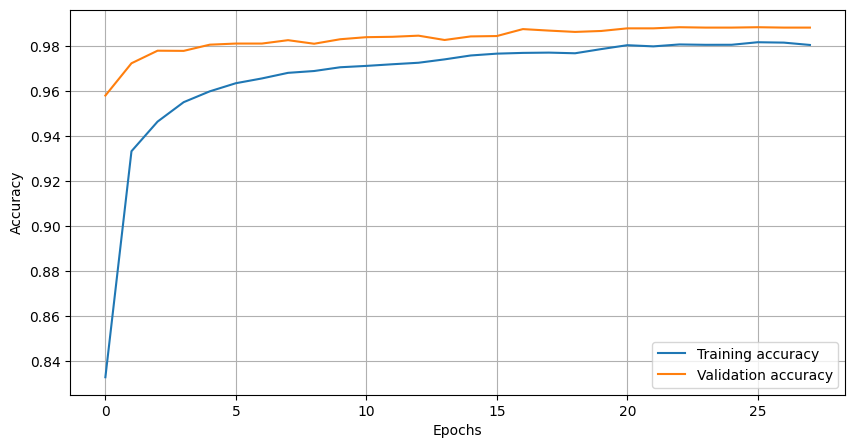

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(histor.history['accuracy'],label='Training accuracy')
plt.plot(histor.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

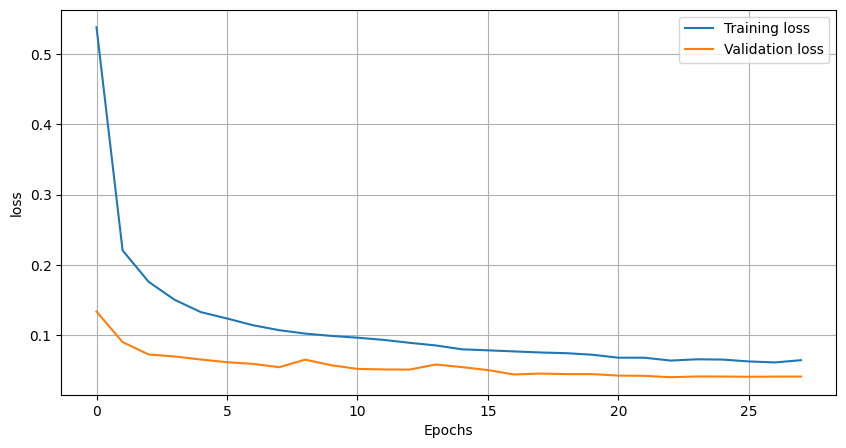

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(histor.history['loss'],label='Training loss')
plt.plot(histor.history['val_loss'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

#### Note:- The model’s accuracy has increased and loss has decreased over the epochs, indicating that the model is learning.

In [ ]:
model.save('mnist_model.keras')  # save the model

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/mnist_model.keras')  # load the model

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)  # evaluate the model for testing purpose

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9875 - loss: 0.0392


In [ ]:
print(test_acc)

0.9891999959945679


# As we can see our model is giving good score on test data....

In [ ]:
# let's take a pic from phone and check how our model is performing....

In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
model=load_model('/content/mnist_model.keras')

def predict_img(img_path):
  img=Image.open(img_path).convert('L')
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  img=ImageOps.invert(img)
  img=img.resize((28,28))
  img_array=np.array(img)
  img_array=img_array.astype('float32')/255
  image_array=img_array.reshape((1,28,28,1))
  prediction=model.predict(image_array)
  prediction_class=np.argmax(prediction)
  confidence=np.max(prediction)
  return confidence, prediction_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


(np.float32(0.8612962), np.int64(8))

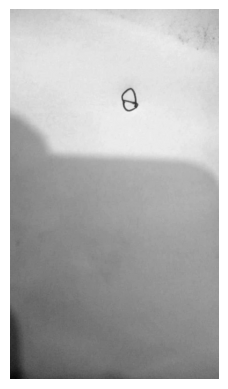

In [ ]:
predict_img('/content/8_new.jpg')

In [ ]:
#lets check the model's performance on mnist images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


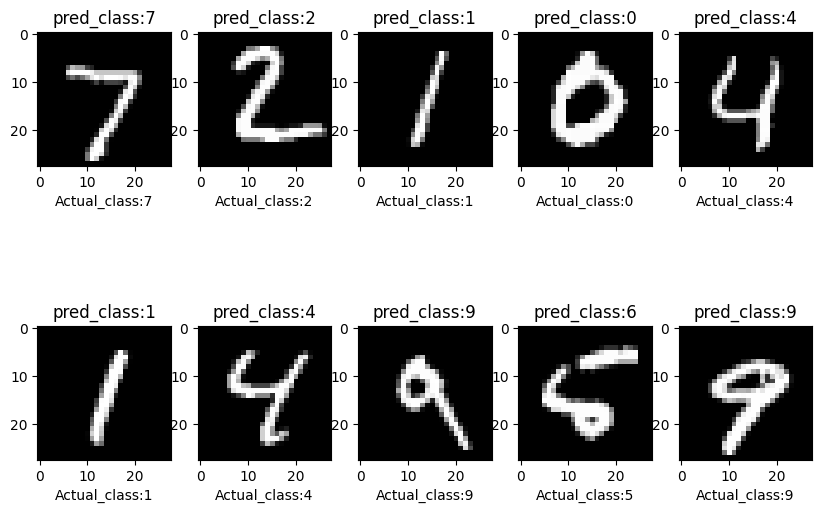

In [ ]:
plt.figure(figsize=(10,7))

for i in range(10):
  plt.subplot(2,5,i+1)
  pred_class=np.argmax(model.predict(test_images[i].reshape((1,28,28,1))))
  plt.imshow(test_images[i],cmap='gray')
  plt.title(f"pred_class:{pred_class}")
  plt.xlabel(f"Actual_class:{np.argmax(test_labels[i])}")


In [ ]:
# Only one wrong prediction that too on complex image rest all are correct so our model is well fitted model....

In [ ]:
y_pred=model.predict(test_images)
classes=np.argmax(y_pred,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
classes

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
test_class=np.argmax(test_labels,axis=1)

In [ ]:
test_class

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import *

In [ ]:
print(classification_report(test_class,classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Without hyperparameter tunning our model is performing good but lets try once with hyperparameter tunning too....I am going to use keras tuner for this...

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

In [ ]:
def build_model(hp):
  model=models.Sequential()
  model.add(layers.Input(shape=(28,28,1)))
  model.add(data_augmentation)

  num_layers_cnn=hp.Int('num_layers_cnn',min_value=1,max_value=5)
  for i in range(num_layers_cnn):
    units=hp.Choice(f'units_{i+1}',values=[16,32,64,128])
    model.add(layers.Conv2D(units,3,activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    if i<num_layers_cnn-1:
      model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Flatten())


  num_layers_ann=hp.Int('num_layers_ann',min_value=1,max_value=5)
  for i in range(num_layers_ann):
    units=hp.Choice(f'dense_units_{i+1}',values=[32,64,128])
    model.add(layers.Dense(units,activation='relu'))
    model.add(layers.Dropout(0.5))

  model.add(layers.Dense(10,activation='softmax'))

  lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


  return model

In [ ]:
tuner=kt.RandomSearch(build_model,
                      max_trials=5,
                      directory='my_dir',
                      objective='val_accuracy',
                      project_name='mnist_project_1')
tuner.search(train_images,train_labels,epochs=5,validation_split=0.20)

Trial 5 Complete [00h 01m 26s]
val_accuracy: 0.9416666626930237

Best val_accuracy So Far: 0.9566666483879089
Total elapsed time: 00h 07m 29s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers_cnn': 2,
 'units_1': 128,
 'num_layers_ann': 2,
 'dense_units_1': 64,
 'learning_rate': 0.001,
 'units_2': 16,
 'dense_units_2': 32}

In [ ]:
tune_model=tuner.get_best_models(num_models=1)[0]
tune_model.fit(train_images,train_labels,initial_epoch=5,epochs=50,validation_split=0.20,batch_size=10,callbacks=[early_stopping,lr_decay])

Epoch 6/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - accuracy: 0.7460 - loss: 0.7894 - val_accuracy: 0.9654 - val_loss: 0.1315 - learning_rate: 0.0010
Epoch 7/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - accuracy: 0.8069 - loss: 0.6272 - val_accuracy: 0.9704 - val_loss: 0.1140 - learning_rate: 0.0010
Epoch 8/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.8346 - loss: 0.5428 - val_accuracy: 0.9725 - val_loss: 0.0993 - learning_rate: 0.0010
Epoch 9/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.8592 - loss: 0.4769 - val_accuracy: 0.9722 - val_loss: 0.1013 - learning_rate: 0.0010
Epoch 10/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.8734 - loss: 0.4332 - val_accuracy: 0.9747 - val_loss: 0.0947 - learning_rate: 0.0010
Epoch 11/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.8796 - loss: 0.4041 - val_accuracy: 0.9785 - val_loss: 0.0808 - learning_rate: 0.0010
Epoch 12/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 

In [ ]:
test_loss_,test_acc_=tune_model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9834 - loss: 0.0625


#### This model also performed well, but the gap between training loss and validation loss is larger compared to the previous model. Therefore, the previous model is considered better. However, it’s important to note that we only tested with 5 trials — if the model had not performed adequately, we could have increased the number of trials to improve the results.
